**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [3]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [5]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [3]:
# write your code here
from scipy import optimize
import numpy as np

# Define the proposed optimal labor function
def optimal_labor(kappa):
    return ((1 - eta) * kappa / w) ** (1 / eta)

# Define the profit function
def profit(l, kappa):
    return kappa * l ** (1 - eta) - w * l

# Assigning values to parameters
eta = 0.5
w = 1.0
kappa_values = [1.0, 2.0]

# Create empty arrays to store the results
calculated_optimal_labor_values = np.zeros(len(kappa_values))
proposed_optimal_labor_values = np.zeros(len(kappa_values))

# Loop over kappa values and solve the profit function
for i, kappa in enumerate(kappa_values):
    result = optimize.minimize_scalar(lambda l: -profit(l, kappa), method='golden')
    calculated_optimal_labor = result.x
    proposed_optimal_labor = optimal_labor(kappa)
    
    # Store results
    calculated_optimal_labor_values[i] = calculated_optimal_labor
    proposed_optimal_labor_values[i] = proposed_optimal_labor

# Check if the calculated and proposed optimal labor values are close
print(f"The calculated optimal labor values: {calculated_optimal_labor_values}")
print(f"The proposed optimal labor values: {proposed_optimal_labor_values}")


The calculated optimal labor values: [0.25 1.  ]
The proposed optimal labor values: [0.25 1.  ]


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [4]:
# write your code here 
from scipy.stats import norm


# Define the demand shock
def demand_shock(rho, sigma_epsilon, kappa_prev):
    epsilon = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon)
    return np.exp(rho * np.log(kappa_prev) + epsilon)

# Define the policy for labor
def labor_policy(kappa, eta, w):
    return ((1-eta)*kappa/w)**(1/eta)

# Define the parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5
w = 1.0
T = 120  # number of periods
K = 10000  # number of simulations

# Initialize the first demand shock
kappa_minus_1 = 1

# Initialize an array to store the values of the salon for each simulation
H_values = np.zeros(K)

# Perform the simulation
for k in range(K):
    # Initialize the demand shock and labor
    kappa_prev = kappa_minus_1
    labor_prev = 0
    # Initialize the sum of the salon's value
    h_sum = 0
    # Simulate for each period
    for t in range(T):
        # Calculate the demand shock
        kappa = demand_shock(rho, sigma_epsilon, kappa_prev)
        # Calculate the optimal labor
        labor = labor_policy(kappa, eta, w)
        # Calculate the value of the salon
        h_value = kappa*labor**(1-eta) - w*labor - iota*(labor != labor_prev)
        h_sum += R**(-t) * h_value
        # Update the previous values
        kappa_prev = kappa
        labor_prev = labor
    
    # Storing the value of the salon for this simulation
    H_values[k] = h_sum

# Calculating the ex-ante expected value of the salon
H = np.mean(H_values)
print(f"The ex-ante expected value of the salon is: {H}")





The ex-ante expected value of the salon is: 27.60598413006337


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [21]:
# write your code here
#New policy
def policy_new(lt_minus1, kappa_t, eta, w, Delta):
    lt_star = ((1 - eta) * kappa_t / w) ** (1 / eta)
    if abs(lt_minus1 - lt_star) > Delta:
        return lt_star
    else:
        return lt_minus1

# Adding Delta
Delta = 0.05


H_values = []  # Storing H for each simulation

for k in range(K):
    lt_minus1 = 0
    total_profit = 0
    epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, 120)
    kappa_series = np.empty(120)
    kappa_series[0] = np.exp(rho * np.log(1) + epsilon_series[0])  # kappa_-1 = 1

    for t in range(1, 120):  # kappa_0 is already set
        kappa_series[t] = np.exp(rho * np.log(kappa_series[t - 1]) + epsilon_series[t])
    
    for t in range(1, 120):
        lt = policy_new(lt_minus1, kappa_series[t], eta, w, Delta)
        total_profit += R**-t * (kappa_series[t] * lt**(1 - eta) - w * lt - int(lt != lt_minus1) * iota)
        lt_minus1 = lt

    H_values.append(total_profit)

# Calculating H
H = np.mean(H_values)
print("Expected value of H:", H)


Expected value of H: 28.112010794106045


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange
import concurrent.futures

# Define a range of Delta values to search over
Delta_values = np.linspace(0, 0.2, 20)  

# Initialize an array to store H for each Delta
H_values = np.zeros_like(Delta_values)

# The policy function
@jit(nopython=True)
def policy_new(lt_minus1, kappa_t, eta, w, Delta):
    lt_star = ((1 - eta) * kappa_t / w) ** (1 / eta)
    if abs(lt_minus1 - lt_star) > Delta:
        return lt_star
    else:
        return lt_minus1

# Simulation function to calculate H value for a specific Delta
@jit(nopython=True)
def simulate_H(Delta, K):
    H_values_temp = np.zeros(K)
    for k in prange(K):
        lt_minus1 = 0
        total_profit = 0
        epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, 120)
        kappa_series = np.empty(120)
        kappa_series[0] = np.exp(rho * np.log(1) + epsilon_series[0])  # kappa_-1 = 1
        for t in range(1, 120):  # kappa_0 is already set
            kappa_series[t] = np.exp(rho * np.log(kappa_series[t - 1]) + epsilon_series[t])
        for t in range(1, 120):
            lt = policy_new(lt_minus1, kappa_series[t], eta, w, Delta)
            total_profit += R**-t * (kappa_series[t] * lt**(1 - eta) - w * lt - int(lt != lt_minus1) * iota)
            lt_minus1 = lt
        H_values_temp[k] = total_profit
    return np.mean(H_values_temp)

# Now use concurrent.futures to run simulations for different Delta values in parallel
with concurrent.futures.ProcessPoolExecutor() as executor:
    for i, H in enumerate(executor.map(simulate_H, Delta_values, [K]*len(Delta_values))):
        H_values[i] = H

# Find Delta that maximizes H
Delta_optimal = Delta_values[np.argmax(H_values)]

print(f"The optimal Delta value is: {Delta_optimal}")

# Plot H against Delta
plt.plot(Delta_values, H_values)
plt.xlabel("Delta")
plt.ylabel("H")
plt.title("Optimal Delta Value")
plt.show()


ImportError: Numba needs NumPy 1.21 or less


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [13]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

Optimal solution: X* = [-9.00674570e-09 -1.29584052e-08], f(X*) = 0.0


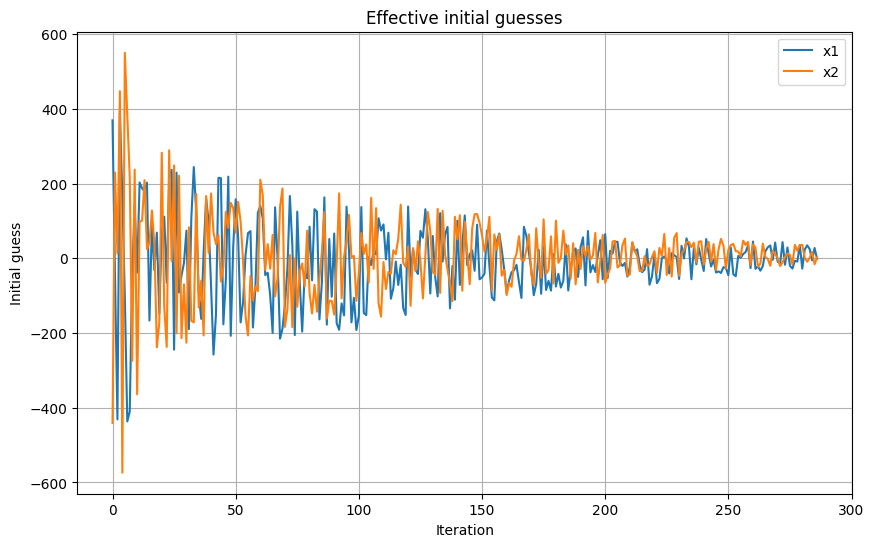

In [32]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Griewank function
def griewank(x):
    A = x[0]**2/4000 + x[1]**2/4000
    B = np.cos(x[0]/np.sqrt(1))*np.cos(x[1]/np.sqrt(2))
    return A - B + 1

# Set the parameters
bounds = np.array([[-600, 600], [-600, 600]])
tol = 10**(-8)
K_warmup = 10
K_max = 1000

# Initialize the results
X_star = None
f_star = np.inf
X_k0 = []
iteration_k = []

# Perform the multi-start optimization
for k in range(K_max):
    # Draw a random initial guess
    X_k = np.random.uniform(bounds[:, 0], bounds[:, 1])
    
    # After the warm-up, mix in the best solution so far
    if k >= K_warmup:
        chi_k = 0.5 * (2 / (1 + np.exp((k - K_warmup) / 100)))
        X_k = chi_k * X_k + (1 - chi_k) * X_star
    
    # Run the BFGS optimizer
    result = minimize(griewank, X_k, method='BFGS', tol=tol)
    X_k_star = result.x
    f_k_star = result.fun

    # Save the effective initial guess for later plotting
    X_k0.append(X_k)
    iteration_k.append(k)
    
    # Update the best solution
    if f_k_star < f_star:
        X_star = X_k_star
        f_star = f_k_star

    # Check if the solution is good enough
    if f_star < tol:
        break

# Print the results
print(f"Optimal solution: X* = {X_star}, f(X*) = {f_star}")

# Plot the effective initial guesses
X_k0 = np.array(X_k0)
plt.figure(figsize=(10, 6))
plt.plot(iteration_k, X_k0[:, 0], label='x1')
plt.plot(iteration_k, X_k0[:, 1], label='x2')
plt.xlabel('Iteration')
plt.ylabel('Initial guess')
plt.legend()
plt.title('Effective initial guesses')
plt.grid()
plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [15]:
# write your code here